In [1]:
# Import numpy symbols to scipy name space
import numpy as _num
linalg = None
from numpy import *
from numpy.random import rand, randn
from numpy.fft import fft, ifft
from numpy.lib.scimath import *

__all__  = []
__all__ += _num.__all__
__all__ += ['randn', 'rand', 'fft', 'ifft']

del _num
# Remove the linalg imported from numpy so that the scipy.linalg package can be
# imported.
del linalg
__all__.remove('linalg')

In [2]:
import numpy as np

a = np.identity(3)

In [3]:
from scipy.integrate import quad
from scipy.optimize import brentq

In [4]:
import numpy as np

np.random.beta(5, 5, size=3)

array([ 0.76194039,  0.29275728,  0.53330091])

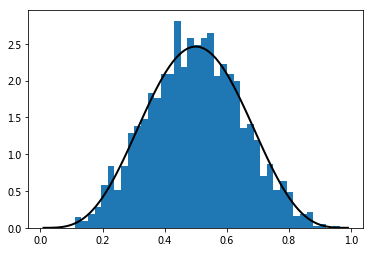

In [5]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

q = beta(5, 5)      # Beta(a, b), with a = b = 5
obs = q.rvs(2000)   # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, normed=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

In [6]:
q.cdf(0.4)      # Cumulative distribution function

0.26656768000000003

In [7]:
q.pdf(0.4)      # Density function

2.0901888000000013

In [8]:
q.ppf(0.8)      # Quantile (inverse cdf) function

0.63391348346427079

In [9]:
q.mean()

0.5

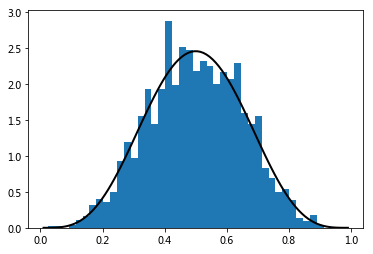

In [10]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

obs = beta.rvs(5, 5, size=2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, normed=True)
ax.plot(grid, beta.pdf(grid, 5, 5), 'k-', linewidth=2)
plt.show()

In [11]:
from scipy.stats import linregress

x = np.random.randn(200)
y = 2 * x + 0.1 * np.random.randn(200)
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
gradient, intercept

(1.9857793029983775, -0.0032203248062395023)

In [12]:

def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        # === if root is between lower and middle === #
        if f(middle) > 0:  
            lower, upper = lower, middle
        # === if root is between middle and upper  === #
        else:              
            lower, upper = middle, upper

    return 0.5 * (upper + lower)

In [13]:
from scipy.optimize import bisect

f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1
bisect(f, 0, 1)

0.4082935042806639

In [14]:
from scipy.optimize import newton

newton(f, 0.2)   # Start the search at initial condition x = 0.2

0.40829350427935679

In [15]:
newton(f, 0.7)   # Start the search at x = 0.7 instead

0.70017000000002816

In [17]:
%timeit bisect(f, 0, 1)

10000 loops, best of 3: 80.3 µs per loop


In [18]:
%timeit newton(f, 0.2)

10000 loops, best of 3: 19.4 µs per loop


In [19]:
brentq(f, 0, 1)

0.40829350427936706

In [20]:
%timeit brentq(f, 0, 1)

10000 loops, best of 3: 21.1 µs per loop


In [21]:
from scipy.optimize import fixed_point

fixed_point(lambda x: x**2, 10.0)  # 10.0 is an initial guess

array(1.0)

In [22]:
from scipy.optimize import fminbound

fminbound(lambda x: x**2, -1, 2)  # Search in [-1, 2]

0.0

In [23]:
from scipy.integrate import quad

integral, error = quad(lambda x: x**2, 0, 1)
integral

0.33333333333333337